Made By:- **Abhishek Sinha**<br>
As task for assessement for internship eligibility at AICT Pvt Ltd.

TASK 2: Stock Market Price Predictor

Title: Stock Price Prediction Using Machine Learning
<br>
Objective: Predict the closing price of a stock using historical data.<br>

Instructions:

Use historical stock data from Yahoo Finance or Kaggle (e.g., AAPL, TCS, INFY).<br>
Clean and preprocess the data (missing values, scaling).

Implement a model using:<br>
Linear Regression, Random Forest, or LSTM (if they know deep learning).<br>
Show a graph comparing actual vs predicted prices for the test data.<br>

Submission format:
Jupyter Notebook (.ipynb) or Python file

### Import the Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load the datasets

In [2]:
stock_action = pd.read_csv('../data/TCS_stock_action.csv')
stock_history = pd.read_csv('../data/TCS_stock_history.csv')
stock_info = pd.read_csv('../data/TCS_stock_info.csv')

In [3]:
print(stock_action.info())
stock_action.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          70 non-null     object 
 1   Dividends     70 non-null     float64
 2   Stock Splits  70 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.8+ KB
None


,Date,Dividends,Stock Splits
0,2004-10-28,0.3750,0.0
1,2005-02-03,0.4375,0.0
2,2005-07-06,0.6250,0.0
3,2005-08-18,0.3750,0.0
4,2005-10-18,0.3750,0.0
5,2006-01-18,0.3750,0.0
6,2006-06-16,0.5625,0.0
7,2006-07-28,0.3750,2.0
8,2006-10-23,0.7500,0.0
9,2007-01-22,0.7500,0.0


In [4]:
print(stock_history.info())
stock_history.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB
None


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [5]:
print(stock_info.info())
stock_info.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   zip     150 non-null    object
 1   400001  108 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB
None


,zip,400001
0,sector,Technology
1,fullTimeEmployees,509058
2,longBusinessSummary,Tata Consultancy Services Limited provides inf...
3,city,Mumbai
4,phone,91 22 6778 9999
5,country,India
6,companyOfficers,[]
7,website,http://www.tcs.com
8,maxAge,1
9,address1,TCS House


We can observe that the stock_action dataset is actually combined in the stock_history database, so we don't need to combine them

In [6]:
# describe the data
data = stock_history
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
std,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842
min,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000


In [7]:
data.describe?

Signature: data.describe(percentiles=None, include=None, exclude=None) -> 'Self'
Docstring:
Generate descriptive statistics.

Descriptive statistics include those that summarize the central
tendency, dispersion and shape of a
dataset's distribution, excluding ``NaN`` values.

Analyzes both numeric and object series, as well
as ``DataFrame`` column sets of mixed data types. The output
will vary depending on what is provided. Refer to the notes
below for more detail.

Parameters
----------
percentiles : list-like of numbers, optional
    The percentiles to include in the output. All should
    fall between 0 and 1. The default is
    ``[.25, .5, .75]``, which returns the 25th, 50th, and
    75th percentiles.
include : 'all', list-like of dtypes or None (default), optional
    A white list of data types to include in the result. Ignored
    for ``Series``. Here are the options:

    - 'all' : All columns of the input will be included in the output.
    - A list-like of dtypes : Limits the

### Missing Values Check/ Imputation

In [8]:
# check for missing values in the dataset
data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

We have no missing values in the data, so we can go to the next part.


### EDA

In [9]:
sns.heatmap?

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

In [10]:
data.drop(['Date'], axis = 1).corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999888,0.999892,0.999787,-0.153362,0.059743,-0.006715
High,0.999888,1.000000,0.999867,0.999914,-0.150918,0.060044,-0.006597
Low,0.999892,0.999867,1.000000,0.999901,-0.154962,0.059916,-0.006622
Close,0.999787,0.999914,0.999901,1.000000,-0.152844,0.060179,-0.006635
Volume,-0.153362,-0.150918,-0.154962,-0.152844,1.000000,-0.010332,0.004752
Dividends,0.059743,0.060044,0.059916,0.060179,-0.010332,1.000000,0.142493
Stock Splits,-0.006715,-0.006597,-0.006622,-0.006635,0.004752,0.142493,1.000000


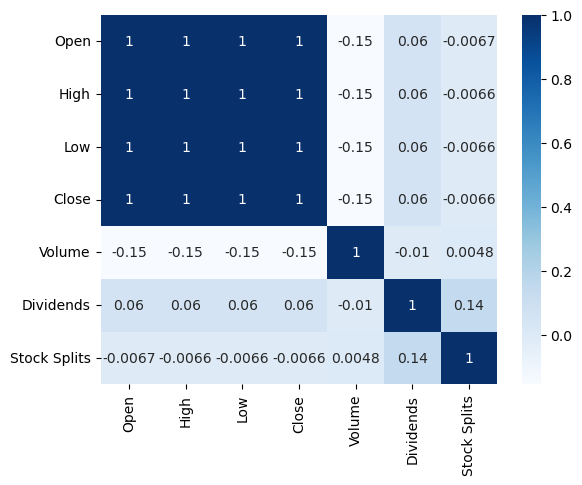

In [11]:
# Correlation heatmap

#first remove the categorical data(Date) from the dataset
data = data[['Open','High','Low', 'Close','Volume','Dividends',"Stock Splits"]]

heatmap = sns.heatmap(data.corr(), cmap = 'Blues', annot = True)
plt.show()

It is overly obvious that the close price is heavily dependent on four features.

Positively on 
1. Open
2. High
3. Low

Negatively on
1. Volume

In [12]:
sns.histplot?

Signature:
sns.histplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    stat='count',
    bins='auto',
    binwidth=None,
    binrange=None,
    discrete=None,
    cumulative=False,
    common_bins=True,
    common_norm=True,
    multiple='layer',
    element='bars',
    fill=True,
    shrink=1,
    kde=False,
    kde_kws=None,
    line_kws=None,
    thresh=0,
    pthresh=None,
    pmax=None,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    log_scale=None,
    legend=True,
    ax=None,
    **kwargs,
)
Docstring:
Plot univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution
of one or more variables by counting the number of observations that fall within
discrete bins.

This function can normalize the statistic computed within each bin to estimate
frequency, density or probability mas

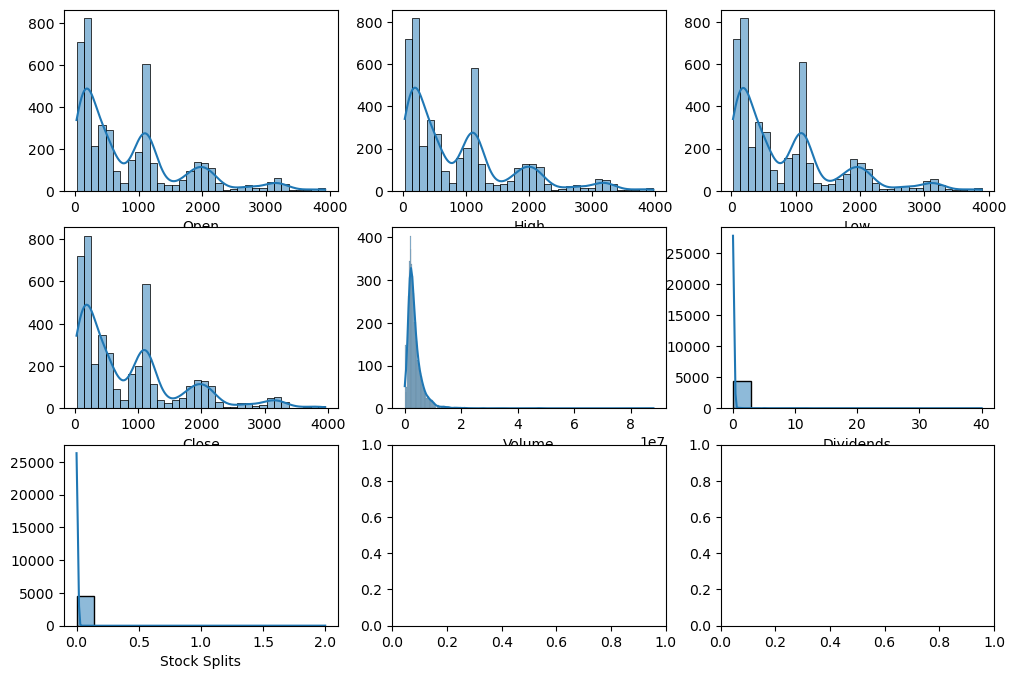

In [13]:
# Visualising the individual features to see their ranges
cols = ['Open','High','Low', 'Close','Volume','Dividends',"Stock Splits"]

fig, ax = plt.subplots(3,3, figsize = (12,8))
ax = ax.flatten()

for i in range(len(cols)):
    sns.histplot(data[cols[i]], kde = True, ax = ax[i])
    ax[i].set_ylabel("")

Pretty much obvious that the above mentione features are highly influencing the close price. 

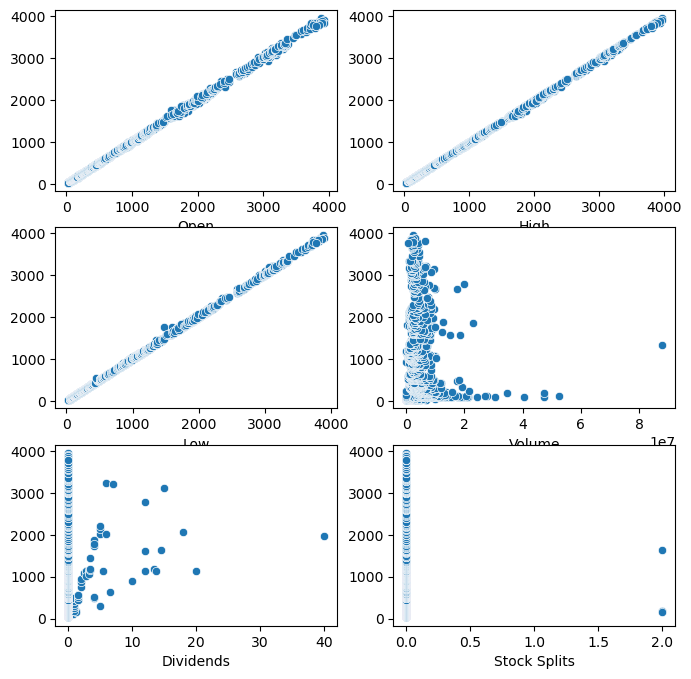

In [14]:
#scatterplots to visualise the relation of diffrent features with the target(Close Price)
cols = ['Open','High','Low','Volume','Dividends',"Stock Splits"]

fig, ax = plt.subplots(3,2, figsize = (8,8))
ax = ax.flatten()

for i in range(len(ax)):
    if(i < len(cols)):
        sns.scatterplot(x = cols[i], y = 'Close', data = data, ax = ax[i])
        ax[i].set_ylabel("")
    else:
        ax.delaxes(ax[i])

plt.show()

Above visualisations might make it seem like that Volume is not a very strong feature. If it turns out like that I would remove it later.

### Model Selection and Training <hr>

#### Random Forest

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV

In [16]:
# Split the data
Y = data[['Close']]
X = data[['Open','High','Low','Volume']]

X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                   Y,
                                                   test_size = 0.2,
                                                   random_state = 42)

In [17]:
#Simple Model
rf = RandomForestRegressor(random_state = 42)

rf.fit(X_train, Y_train)

preds = rf.predict(X_test)
print(f"""Mean Squared Error : {mean_squared_error(Y_test, preds)}
          Mean Absoulte Error: {mean_absolute_error(Y_test, preds)}""")

Mean Squared Error : 81.62788066146427
          Mean Absoulte Error: 5.008635047237657


In [18]:
print(rf.feature_names_in_)
rf.feature_importances_

['Open' 'High' 'Low' 'Volume']


array([1.25555365e-01, 6.32302129e-01, 2.42122581e-01, 1.99259105e-05])

In [19]:
help(rf)

Help on RandomForestRegressor in module sklearn.ensemble._forest object:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |
 |  A random forest regressor.
 |
 |  A random forest is a meta estimator that fits a number of decision tree
 |  regressors on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=Tr

In [20]:
#Tuning the hyperparameters fro Random_Forest using GridSearchCV
param_grid = {
    'n_estimators':[10,20,50,100,200],
    'max_features':['sqrt','int'],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,5,10]
}

grid_search = GridSearchCV(
    estimator = rf,
    param_grid = param_grid,
    cv = 5,
    scoring='neg_root_mean_squared_error',  # or 'r2', 'neg_mean_squared_error'
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, Y_train['Close'])

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best RMSE: {-grid_search.best_score_}")

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE: 10.426806221049862


In [21]:
#hyperparam tuned RF
tuned_rf = RandomForestRegressor(max_features= 'sqrt',
                                 min_samples_leaf = 1,
                                 min_samples_split= 2,
                                 n_estimators= 200,
                                 random_state = 42)

tuned_rf.fit(X_train, Y_train)
final_preds = tuned_rf.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(Y_test, final_preds)}')

Mean Squared Error: 85.82986724205846


In [22]:
def plotPredictedVSActual(actual, predicted):
    #Plot of the predicted vs actual data
    actual_list = actual['Close'].tolist()
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x = actual_list, y = predicted, alpha = 0.7)
    
    # Add a diagonal line representing perfect predictions (y=x)
    min_val = min(min(actual_list), min(predicted))
    max_val = max(max(actual_list), max(predicted))
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')
    
    # Add labels and title
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted Values Plot")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

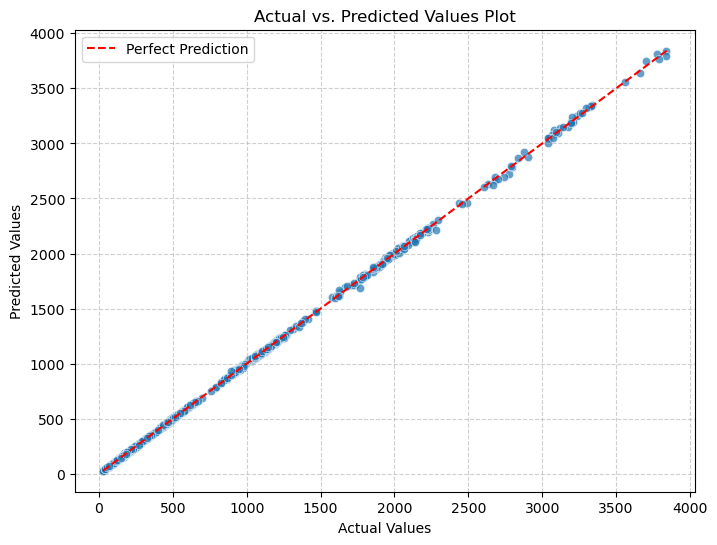

In [23]:
plotPredictedVSActual(Y_test, final_preds)